NAME: CH V SAISRI

From dataset, prediction of optimum number of clusters and represent it visually.

In [1]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
#DATASET
data_set=datasets.load_iris()
data_frame=pd.DataFrame(data_set.data,columns=data_set.feature_names)
data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


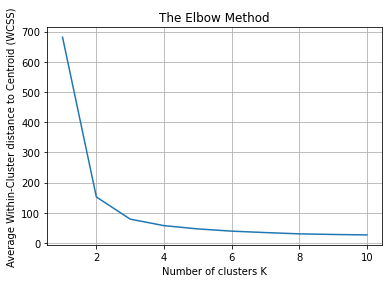

In [24]:
#PICK RANDOM K POINTS FROM DATASET
random_pick=data_frame.iloc[:,[0,1,2,3]].values

#ELBOW METHOD TO FIND CLUSTERS
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(random_pick)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)') 
plt.grid()
plt.show()

In [29]:
#APPLYING K-MEANS TO DATASET
kmeans=KMeans(n_clusters=8,init='k-means++',n_init=10,max_iter=300,tol=0.0001,precompute_distances='deprecated',verbose=0,random_state=0)
y_kmeans=kmeans.fit_predict(random_pick)
y_kmeans

array([5, 0, 0, 0, 5, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 5, 0, 0, 5, 5, 5, 0, 0, 5, 5, 5, 0, 0, 5, 5, 0, 5, 5, 0, 0, 5,
       5, 0, 5, 0, 5, 0, 7, 7, 7, 4, 7, 4, 7, 3, 7, 4, 3, 4, 4, 7, 4, 7,
       4, 4, 1, 4, 1, 4, 1, 7, 7, 7, 7, 7, 7, 3, 4, 3, 4, 1, 4, 7, 7, 7,
       4, 4, 4, 7, 4, 3, 4, 4, 4, 7, 3, 4, 6, 1, 2, 6, 6, 2, 4, 2, 6, 2,
       6, 1, 6, 1, 1, 6, 6, 2, 2, 1, 6, 1, 2, 1, 6, 2, 1, 1, 6, 2, 2, 2,
       6, 1, 1, 2, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 1])

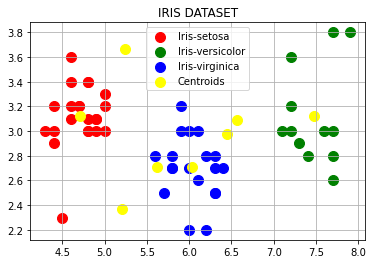

In [46]:
#VISUALIZE CLUSTERS
plt.scatter(random_pick[y_kmeans == 0, 0], random_pick[y_kmeans == 0, 1], s = 100, c = 'red', label='Iris-setosa')
plt.scatter(random_pick[y_kmeans == 2, 0], random_pick[y_kmeans == 2, 1], s = 100, c = 'green', label='Iris-versicolor')
plt.scatter(random_pick[y_kmeans == 1, 0], random_pick[y_kmeans == 1, 1], s = 100, c = 'blue', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label='Centroids')
plt.title('IRIS DATASET')
plt.legend(loc='upper center')
plt.grid()
plt.show()